In [1]:
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_dir = r'C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/train_set/'
test_dir = r'C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/test_set/'
model_dir = r'C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/model/model_1'

In [3]:
os.listdir(train_dir)

['generated', 'orginal']

In [4]:
len(os.listdir(test_dir))

42

In [5]:
len(os.listdir(train_dir+"generated"))

823

In [6]:
len(os.listdir(train_dir+"orginal"))

784

In [7]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=26,
    validation_split = 0.1,
    subset = "training",
    image_size=(256, 256),
    color_mode='grayscale',
    batch_size=32
)

Found 1607 files belonging to 2 classes.
Using 1447 files for training.


In [8]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=26,
    validation_split = 0.1,
    subset = "validation",
    image_size=(256, 256),
    color_mode='grayscale',
    batch_size=32
)

Found 1607 files belonging to 2 classes.
Using 160 files for validation.


In [9]:
training_set

<BatchDataset shapes: ((None, 256, 256, 1), (None,)), types: (tf.float32, tf.int32)>

In [10]:
class_names = training_set.class_names
class_names

['generated', 'orginal']

In [11]:
data_augmentation = keras.Sequential( # zwiekszenie ilosci danych
  [
    # Ta warstwa odwróci obrazy w poziomie lub w pionie w oparciu o modeatrybut
    tf.keras.layers.experimental.preprocessing.RandomFlip(
        "horizontal_and_vertical", input_shape=(256, 256, 1)),
    # Ta warstwa zastosuje losowe obroty do każdego obrazu.
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # Ta warstwa zastosuje losowe zoomy do każdego obrazu.
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # zmiana rozmiaru obrazu
  ]
)

In [1]:

model = Sequential([
    data_augmentation,
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
#    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [13]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_dir + '/checkpoint',
    save_weights_only=False,
    monitor='val_loss', 
    mode='min', # mam loss wiec min
    save_best_only=True)

In [14]:
callbacks = [
             EarlyStopping(patience=5),
             model_checkpoint_callback,
]

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

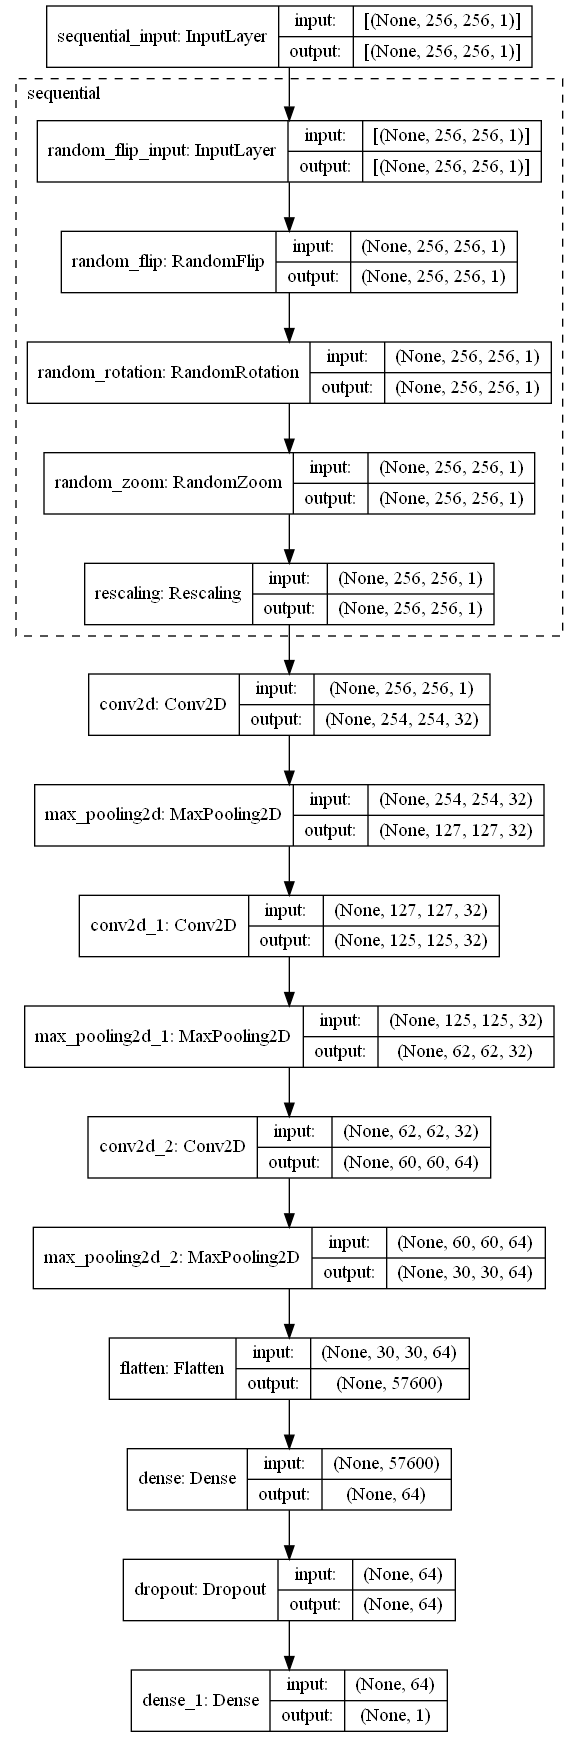

In [16]:
tf.keras.utils.plot_model(
    model,
    to_file=model_dir+ "/model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [17]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [18]:
history = model.fit(training_set,validation_data=validation_set, epochs=200, callbacks=callbacks)

Epoch 1/200


C:\Users\tomeczek\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


46/46 [==============================] - 14s 92ms/step - loss: 0.5934 - binary_accuracy: 0.6524 - val_loss: 0.3871 - val_binary_accuracy: 0.8313
INFO:tensorflow:Assets written to: C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/model/model_1\checkpoint\assets
Epoch 2/200
46/46 [==============================] - 2s 52ms/step - loss: 0.3453 - binary_accuracy: 0.8521 - val_loss: 0.2444 - val_binary_accuracy: 0.9062
INFO:tensorflow:Assets written to: C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/model/model_1\checkpoint\assets
Epoch 3/200
46/46 [==============================] - 2s 51ms/step - loss: 0.2796 - binary_accuracy: 0.8784 - val_loss: 0.1059 - val_binary_accuracy: 0.9563
INFO:tensorflow:Assets written to: C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/model/model_1\checkpoint\assets
Epoch 4/200
46/46 [==============================] - 2s 51ms/step - loss: 0.1706 - binary_accuracy: 0.9350 - val_loss: 0.0562 - val_binary_accuracy: 0.9812
INFO:tensorflow:Assets writ

In [19]:
metrics_df = pd.DataFrame(history.history)

In [20]:
metrics_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.593405,0.652384,0.387066,0.83125
1,0.345327,0.852108,0.244448,0.90625
2,0.279623,0.878369,0.105867,0.95625
3,0.170642,0.935038,0.056242,0.98125
4,0.134962,0.949551,0.038041,1.00000
5,0.106548,0.959226,0.025073,1.00000
6,0.092265,0.967519,0.013894,1.00000
7,0.062918,0.977885,0.006787,1.00000
8,0.046797,0.986869,0.008082,1.00000
9,0.022832,0.994471,0.008445,1.00000


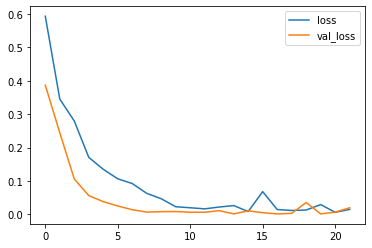

In [21]:
metrics_df[["loss","val_loss"]].plot();

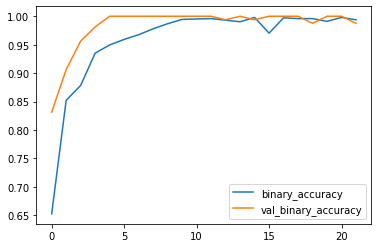

In [22]:
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [23]:
loss, accuracy = model.evaluate(validation_set)

5/5 [==============================] - 0s 55ms/step - loss: 0.0198 - binary_accuracy: 0.9875


In [24]:
print('Accuracy on test dataset:', accuracy)

Accuracy on test dataset: 0.987500011920929


In [25]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


(256, 256, 1)


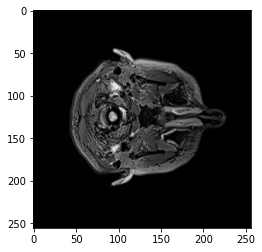

 is good

(256, 256, 1)


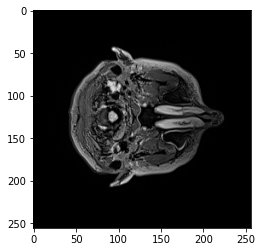

 is good

(256, 256, 1)


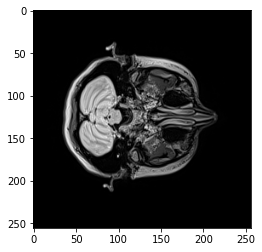

 is good

(256, 256, 1)


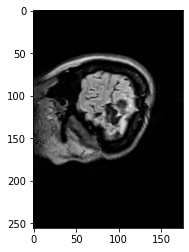

 is good

(256, 256, 1)


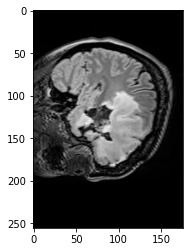

 is good

(256, 256, 1)


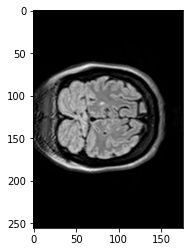

 is good

(256, 256, 1)


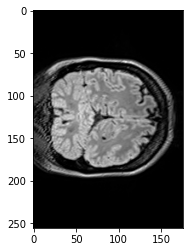

 is good

(256, 256, 1)


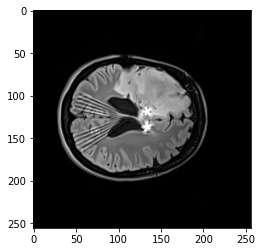

 is bad

(256, 256, 1)


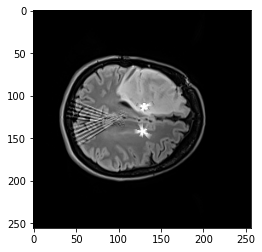

 is bad

(256, 256, 1)


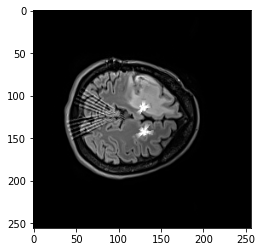

 is bad

(256, 256, 1)


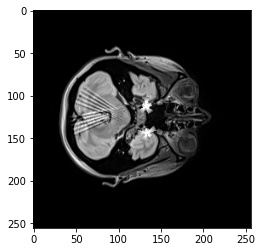

 is bad

(256, 256, 1)


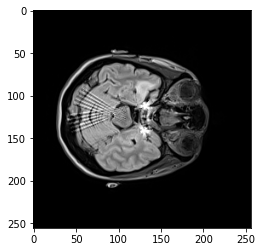

 is bad

(256, 256, 1)


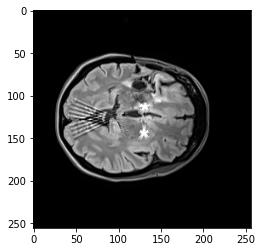

 is bad

(256, 256, 1)


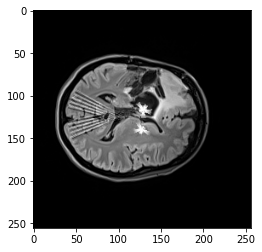

 is bad

(256, 256, 1)


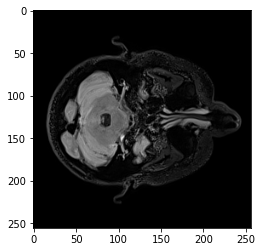

 is good

(256, 256, 1)


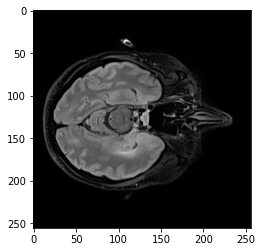

 is good

(256, 256, 1)


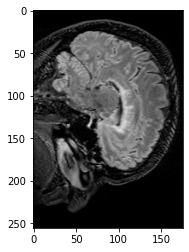

 is good

(256, 256, 1)


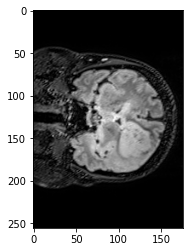

 is good

(256, 256, 1)


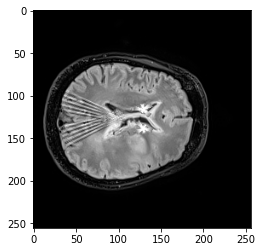

 is bad

(256, 256, 1)


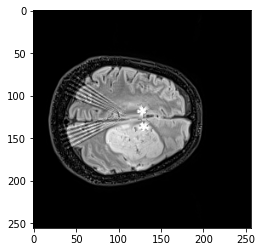

 is bad

(256, 256, 1)


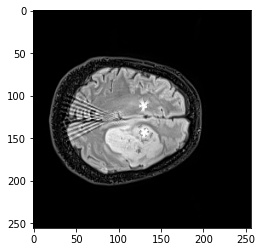

 is bad

(256, 256, 1)


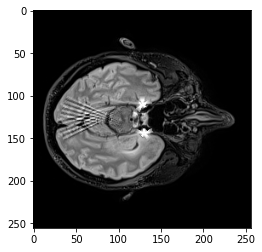

 is bad

(256, 256, 1)


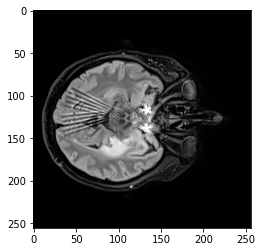

 is bad

(256, 256, 1)


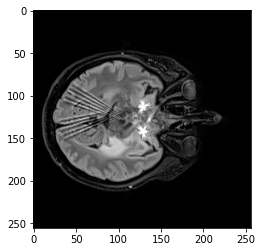

 is bad

(256, 256, 1)


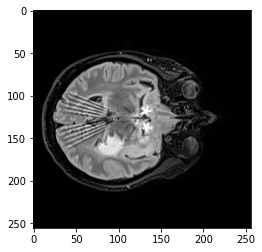

 is bad

(256, 256, 1)


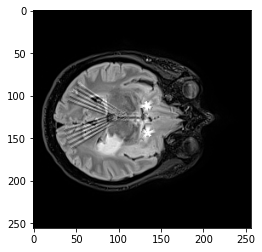

 is bad

(256, 256, 1)


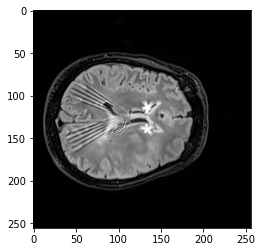

 is bad

(256, 256, 1)


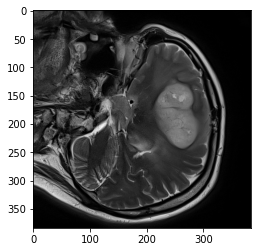

 is good

(256, 256, 1)


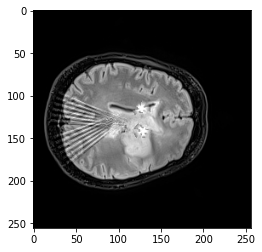

 is bad

(256, 256, 1)


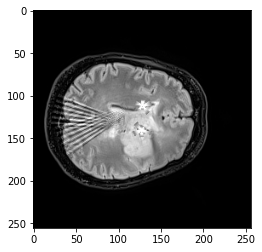

 is bad

(256, 256, 1)


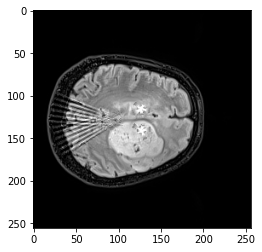

 is bad

(256, 256, 1)


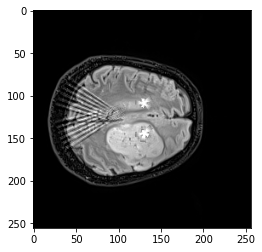

 is bad

(256, 256, 1)


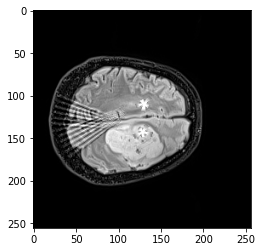

 is bad

(256, 256, 1)


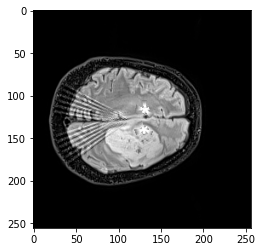

 is bad

(256, 256, 1)


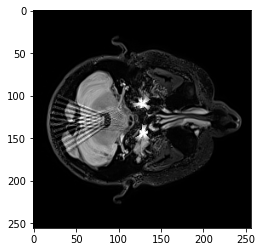

 is bad

(256, 256, 1)


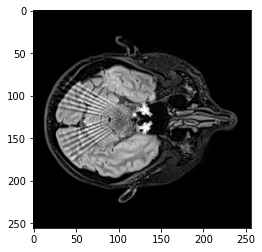

 is bad

(256, 256, 1)


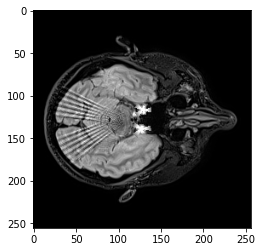

 is bad

(256, 256, 1)


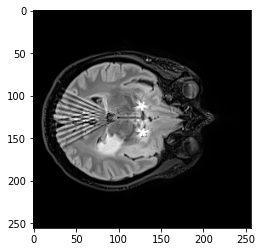

 is bad

(256, 256, 1)


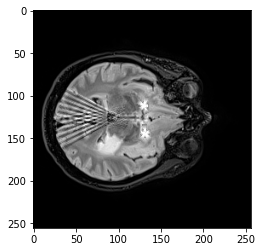

 is bad

(256, 256, 1)


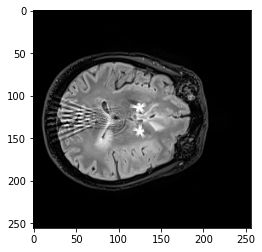

 is bad

(256, 256, 1)


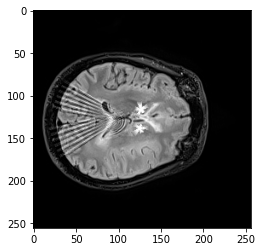

 is bad

(256, 256, 1)


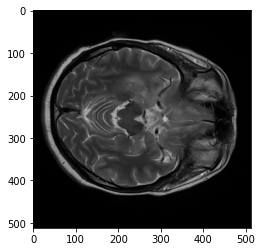

 is good


In [26]:
for name in os.listdir(test_dir):
    print()
    test_image = image.load_img(
        os.path.join(test_dir, name), target_size=(256, 256),
        color_mode='grayscale')
    test_image = image.img_to_array(test_image)
    print(test_image.shape)

    img = mpimg.imread(os.path.join(test_dir, name))
    plt.imshow(img)
    plt.show()
    
    test_image = np.expand_dims(test_image, axis=0)
    prediction = model.predict(test_image)
    prediction[0][0]
    if prediction[0][0]>0.5:
        print(" is good")
    else:
        print(" is bad")

In [ ]:
model.save(model_dir + "/model.h5")

In [27]:
test_dir = r'C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/ss/test_set/'

In [28]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=26,
    image_size=(256, 256),
    color_mode='grayscale',
    batch_size=32
)

Found 42 files belonging to 2 classes.


In [ ]:
os.listdir(test_dir)

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
# load the image
data = []
for i in os.listdir(test_dir):
    img = load_img(test_dir+ i)
    # convert to numpy array
    img_np = img_to_array(img)
    # expand dimension to one sample
    sample = expand_dims(img_np, 0)
    data.append(sample)

In [ ]:
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, zoom_range=[0.5,1.0], rotation_range=90)
# prepare iterator
it = datagen.flow(data, batch_size=1)

# generate samples and plot
# for i in range(9):
# # define subplot
#     pyplot.subplot(330 + 1 + i)
#     # generate batch of images
#     batch = it.next()
#     # convert to unsigned integers for viewing
#     image = batch[0].astype('uint8')
#     # plot raw pixel data
#     pyplot.imshow(image)
# # show the figure
# pyplot.show()

In [ ]:
it = datagen.flow(data, batch_size=1)

In [ ]:
batch = it.next()

In [ ]:
!pip install SciPy

In [ ]:
len(it)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve ( y_val_cat , y_val_cat_prob)

In [ ]:
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()  

In [1]:
# cnn model for the cifar10 problem with test-time augmentation
import numpy
from numpy import argmax
from numpy import mean
from numpy import std
from numpy import expand_dims
from sklearn.metrics import accuracy_score
from keras.datasets.cifar10 import load_data
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization

ModuleNotFoundError: No module named 'sklearn'